# Foundations of Data Analysis 1 - Week 3 - Professional Bull Riding

<img src="images/week13.jpg">

Over 1,200 bull riders from around the world are members of the Professional Bull Riders (PBR). They compete in more than 300 PBR-affiliated bull riding events per year. In the American tradition, the rider must stay atop the bucking bull for a full eight seconds. This data set includes information about the top-ranked bull riders for 2013.  Rankings are based on a system which awards points for qualified rides at events throughout the season. 

**For the 2013 season, Is there a linear relationship between how often a rider placed in the Top 10 and the number of times he stayed on his bull for a full 8 seconds?**

In [1]:
bull <- read.csv("data/BullRiders.csv")
head(bull)

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,⋯,0,0,0.00,0,0.00,0,0,0,0.0,0.0
2,Matt Triplett,2,USA,1991,67,160,4,28,86,33,⋯,0,0,0.00,0,0.00,0,0,0,0.0,0.0
3,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,⋯,82,40,9273.25,8,0.49,3,8,13,287.0,313340.3
4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,⋯,0,0,0.00,0,0.00,0,0,0,0.0,0.0
5,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,⋯,0,0,0.00,0,0.00,0,0,0,0.0,0.0
6,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,81,29,⋯,87,53,10608.25,4,0.61,1,10,14,559.5,208724.5


How Many observations are in the dataset?

In [2]:
str(bull)

'data.frame':	58 obs. of  44 variables:
 $ Rider             : Factor w/ 58 levels "Austin Meier",..: 26 39 23 30 41 58 21 50 43 24 ...
 $ Rank15            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country           : Factor w/ 4 levels "AUS","BRA","CAN",..: 2 4 4 2 4 2 2 2 4 4 ...
 $ YearBorn          : int  1984 1991 1987 1994 1990 1979 1982 1987 1989 1986 ...
 $ Height            : int  66 67 70 68 73 72 70 67 68 70 ...
 $ Weight            : int  163 160 140 145 160 170 180 150 135 160 ...
 $ YearsPro          : int  3 4 10 2 6 9 16 7 9 10 ...
 $ Events14          : int  28 28 22 1 15 28 28 28 12 14 ...
 $ BuckOuts14        : int  93 86 63 1 41 81 90 92 30 37 ...
 $ Rides14           : int  41 33 25 0 17 29 41 50 8 16 ...
 $ CupPoints14       : num  9520 7494 4974 1672 3240 ...
 $ Rank14            : int  2 3 4 0 31 17 8 1 54 9 ...
 $ RidePer14         : num  0.441 0.384 0.397 0 0.415 ...
 $ RidesPer_45bull_14: num  0 0.2 0.5 0 0 ...
 $ Rides90pts_14     : int  5 2 4 0 0 1 2 1 0 2 ...
 $

How many of the first 10 riders have been pro for 10 years or more?

In [3]:
first10riders<-bull[1:10,]
first10vet <-first10riders[first10riders$YearsPro > 9,]
first10vet

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
3,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,⋯,82,40,9273.25,8,0.49,3,8,13,287.00,313340.3
7,Guilherme Marchi,7,BRA,1982,70,180,16,28,90,41,⋯,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.7
10,J.W. Harris,10,USA,1986,70,160,10,14,37,16,⋯,0,0,0.00,0,0.00,0,0,0,0.00,0.0


Of the top 15 riders so far in 2015, how many rides were completed by the rider with the fewest buck-outs in 2014?

In [4]:
first15riders<-bull[1:15,]

which(first15riders$BuckOuts14 == min(first15riders$BuckOuts14))

[1] 4

In [5]:
bull[4,]

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0


Answer: 0 (Rides14)

**On average, a bull rider in 2013 has how many rides?**

In [6]:
#Subset for riders that participated in at least one event in 2013
new_bull <- bull[bull$Events13  > 0 ,]

[1]  0 11 19 25 50

[1] 18.73171

[1] 12.7319

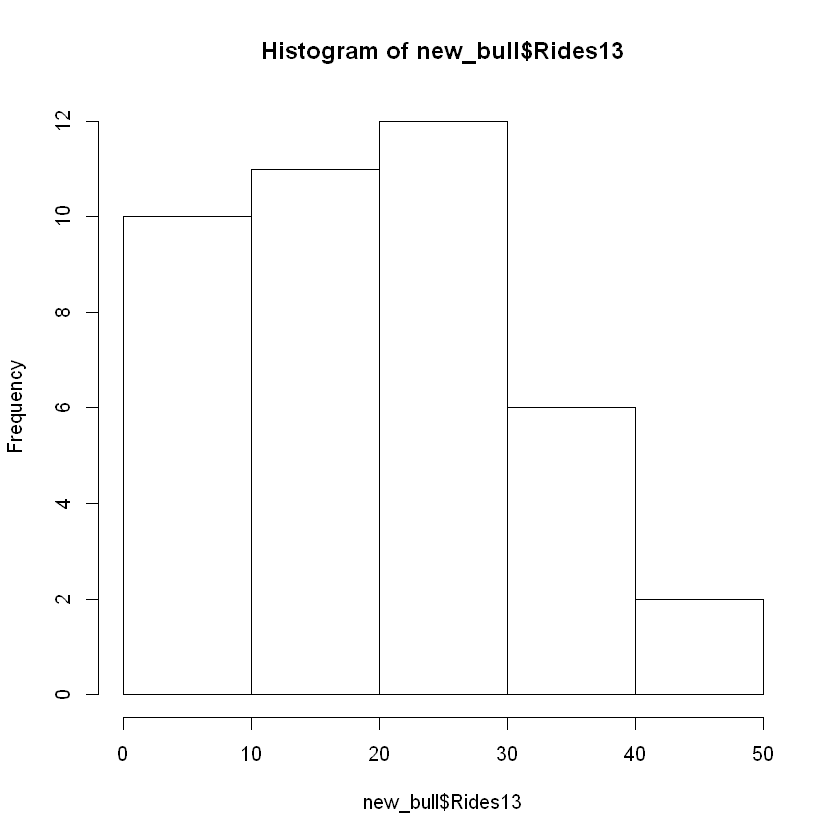

In [7]:
# Visualize and describe the first variable of interest
hist(new_bull$Rides13)
fivenum(new_bull$Rides13)
mean(new_bull$Rides13)
sd(new_bull$Rides13)

**Aswer:19 (median), because the distribution is skewed.**

**These bull riders made it into the Top 10 an average of _?_ times in 2013.**

[1]  0  2  6  8 14

[1] 5.390244

[1] 4.036571

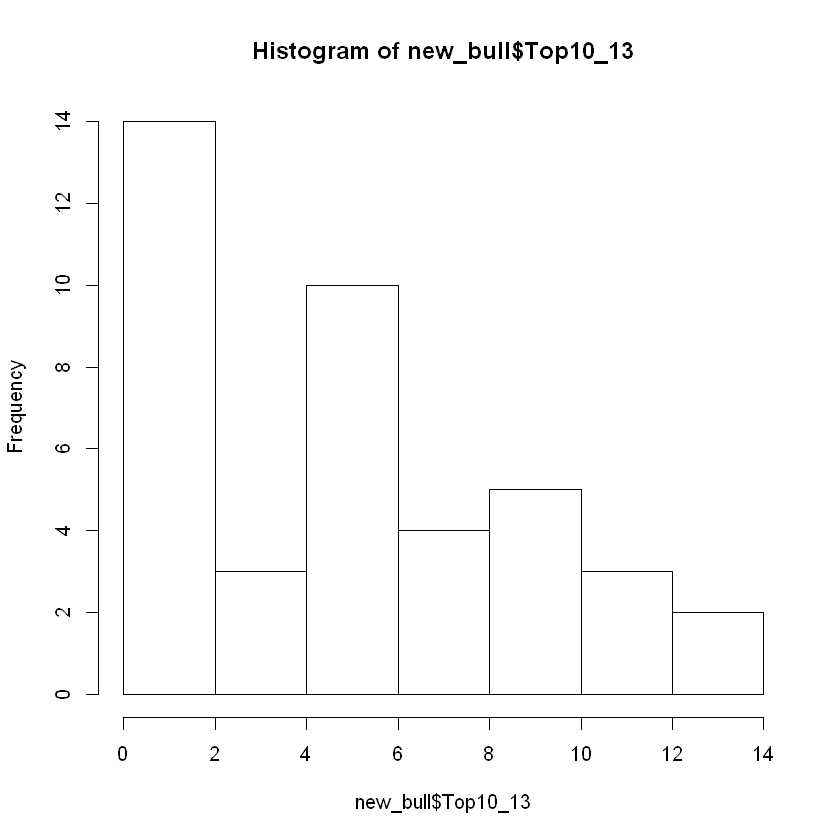

In [8]:
# Visualize and describe the second variable of interest
hist(new_bull$Top10_13)
fivenum(new_bull$Top10_13)
mean(new_bull$Top10_13)
sd(new_bull$Top10_13)

**Aswer:6 (median), because the distribution is skewed.**

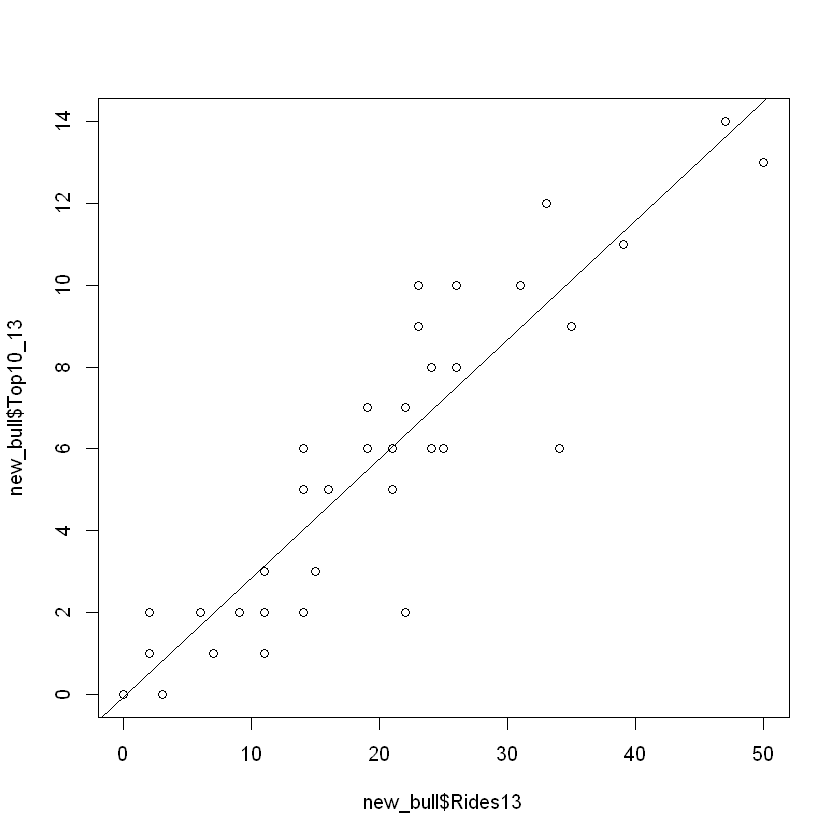

In [16]:
# Create a scatterplot
plot(new_bull$Rides13,new_bull$Top10_13)

# Add line of best fit
abline(lm(new_bull$Top10_13~new_bull$Rides13))

On the scatterplot, we see a data point with a fairly large residual. This rider had 22 rides, but he only placed in the Top 10 two times. This rider's data point falls **below** the line of best fit. If his data followed the line of best fit, he should have placed in the Top 10 about **6** times.

In [14]:
# Calculate the correlation coefficient
cor(new_bull$Rides13,new_bull$Top10_13)

[1] 0.916606

In [15]:
# Create a correlation matrix 
vars <- c("Top10_13", "Rides13")
cor(new_bull[,vars])

,Top10_13,Rides13
Top10_13,1.000000,0.916606
Rides13,0.916606,1.000000


**After looking at the data for this rider(Top10_13==2 & new_bull$Rides13==22), can you explain why he has placed in the Top 10 so few times?**

In [17]:
#identify a specific record
which(new_bull$Top10_13==2 & new_bull$Rides13==22)

[1] 4

In [18]:
new_bull[4,]

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
5,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,⋯,0,0,0,0,0,0,0,0,0,0


In [19]:
str(new_bull[4,])

'data.frame':	1 obs. of  44 variables:
 $ Rider             : Factor w/ 58 levels "Austin Meier",..: 41
 $ Rank15            : int 5
 $ Country           : Factor w/ 4 levels "AUS","BRA","CAN",..: 4
 $ YearBorn          : int 1990
 $ Height            : int 73
 $ Weight            : int 160
 $ YearsPro          : int 6
 $ Events14          : int 15
 $ BuckOuts14        : int 41
 $ Rides14           : int 17
 $ CupPoints14       : num 3240
 $ Rank14            : int 31
 $ RidePer14         : num 0.415
 $ RidesPer_45bull_14: num 0
 $ Rides90pts_14     : int 0
 $ Wins14            : int 1
 $ Top5_14           : int 1
 $ Top10_14          : int 3
 $ FinalPoints14     : num 83.5
 $ Earnings14        : num 77426
 $ Events13          : int 24
 $ BuckOuts13        : int 66
 $ Rides13           : int 22
 $ CupPoints13       : num 4304
 $ Rank13            : int 25
 $ RidePer13         : num 0.333
 $ RidesPer_45bull_13: num 0
 $ Rides90pts_13     : int 0
 $ Wins13            : int 0
 $ Top5_13  

**His ride percentage was only about 33% (RidePer13), which wasn't high enough to place him in the Top 10.**

There is a strong **positive** linear relationship between the number of 8-second rides a bull rider completed and the total number of times he made it in the Top 10 after the 2013 season, **(r = 0.917)**. The average number of rides for these bull riders was around **19**.There were no significant outliers. One rider appeared to have placed in the top-10 rankings only twice, despite an above-average number of rides. Upon closer inspection, we could see that he did not have **a very high 
ride percentage** which might account for his few appearances in the Top 10.

### In 2012, which variable had the strongest linear relationship with Earnings: 

Create a dataset which contains riders that participated in at least one event in 2012.

In [21]:
new_bull2 <- bull[bull$Events12  >= 1 ,]

Make a histogram to visualize the distribution of Earnings for 2012.

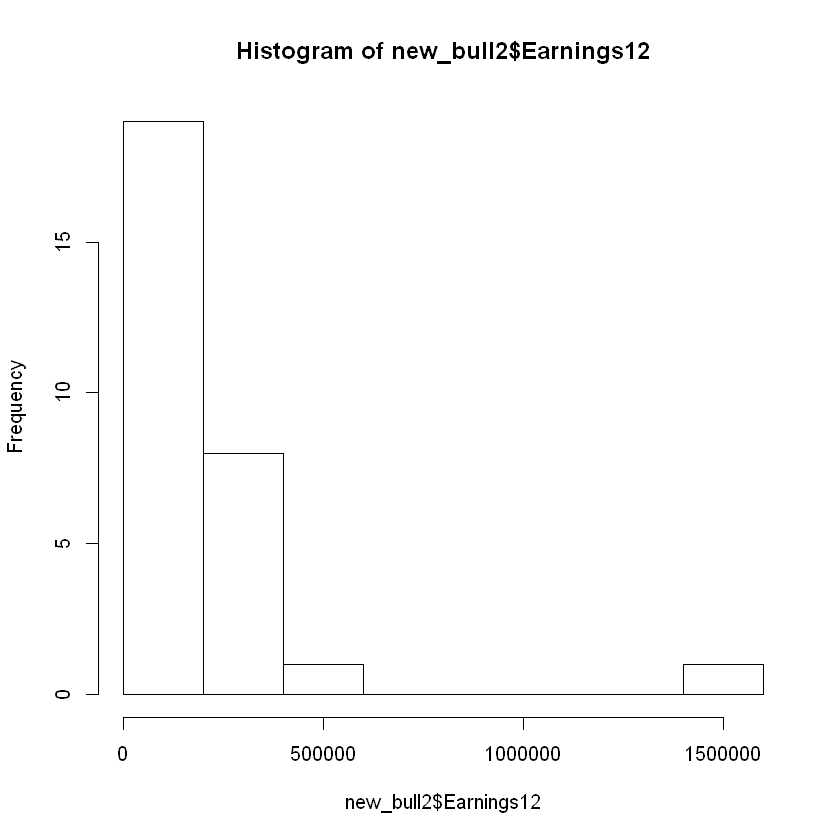

In [23]:
hist(new_bull2$Earnings12)

Generate the appropriate descriptive statistics for this distribution.

In [24]:
mean(new_bull2$Earnings12)
sd(new_bull2$Earnings12)
median(new_bull2$Earnings12)
fivenum(new_bull2$Earnings12)
max(new_bull2$Earnings12)

[1] 201370.8

[1] 267178.1

[1] 147952.3

[1]   21343.28   66814.33  147952.34  239935.66 1464475.61

[1] 1464476

Make a correlation matrix for Earnings12, RidePer12 and CupPoints12.

In [27]:
vars <- c("Earnings12", "RidePer12", "CupPoints12")
cor(new_bull2[,vars])

,Earnings12,RidePer12,CupPoints12
Earnings12,1.0000000,0.5934110,0.6569363
RidePer12,0.5934110,1.0000000,0.9183375
CupPoints12,0.6569363,0.9183375,1.0000000


Plot a scatterplot for Earnings12 with each variable of interest.  Put Earnings12 on the y-axis. 

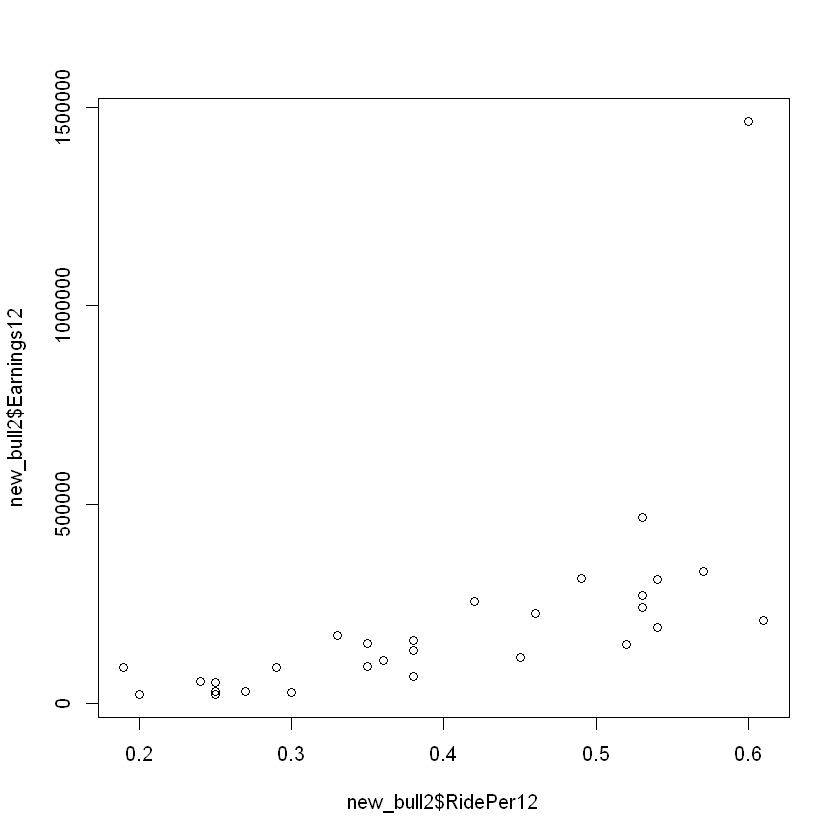

In [28]:
plot(new_bull2$RidePer12, new_bull2$Earnings12)

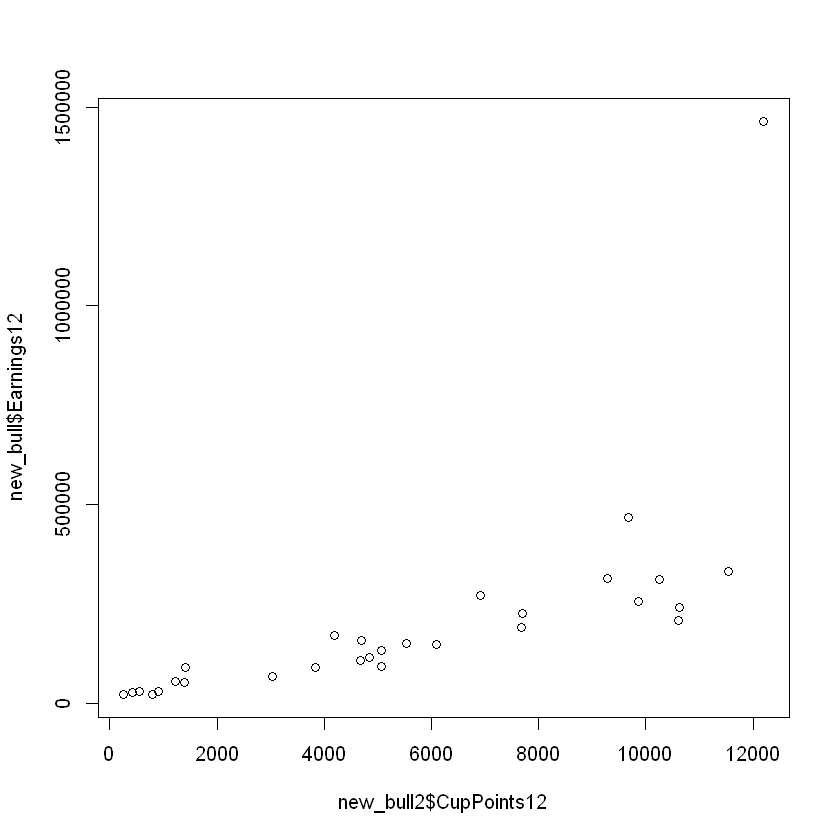

In [29]:
plot(new_bull2$CupPoints12, new_bull$Earnings12)

Identify specific case (Earnings12 == max(new_bull2$Earnings12))

In [30]:
which(new_bull2$Earnings12 == max(new_bull2$Earnings12))
new_bull2[4,]

[1] 4

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
8,Silvano Alves,8,BRA,1987,67,150,7,28,92,50,⋯,103,62,12201.75,1,0.6,2,8,18,1648,1464476


Subset the data

In [31]:
nooutlier <- new_bull2[new_bull2$Earnings12 < 1000000 ,]

Then rerun the correlation matrix and the scatterplots to see the difference. 

In [33]:
vars <- c("Earnings12", "RidePer12", "CupPoints12")
cor(new_bull2[,vars])

,Earnings12,RidePer12,CupPoints12
Earnings12,1.0000000,0.5934110,0.6569363
RidePer12,0.5934110,1.0000000,0.9183375
CupPoints12,0.6569363,0.9183375,1.0000000


In [32]:
vars <- c("Earnings12", "RidePer12", "CupPoints12")
cor(nooutlier[,vars])

,Earnings12,RidePer12,CupPoints12
Earnings12,1.0000000,0.8035574,0.8929208
RidePer12,0.8035574,1.0000000,0.9097881
CupPoints12,0.8929208,0.9097881,1.0000000


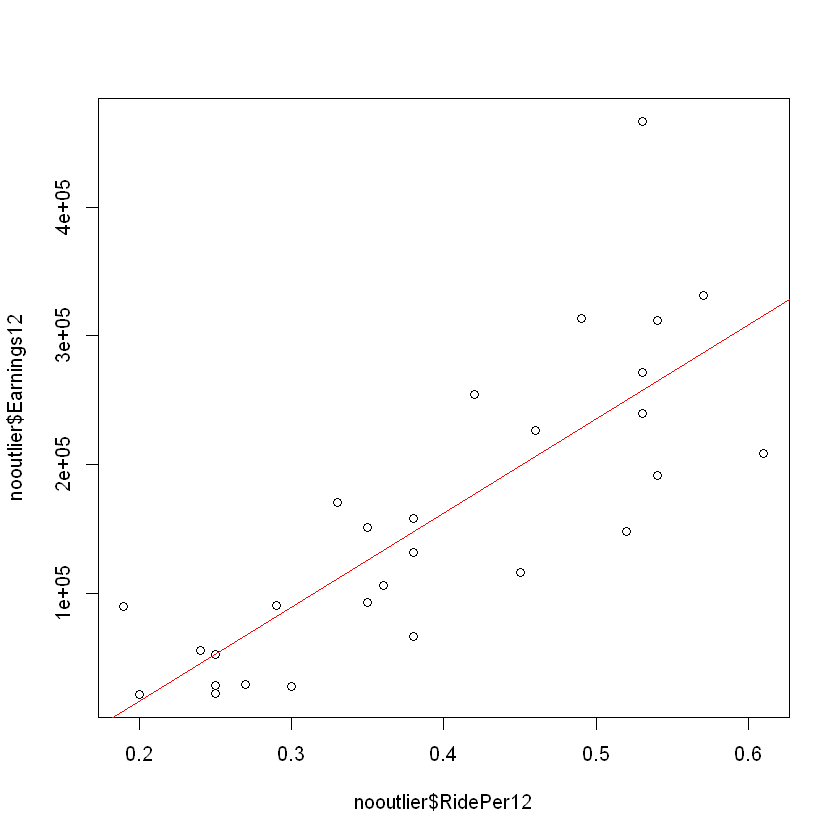

In [36]:
plot(nooutlier$RidePer12, nooutlier$Earnings12)
abline(lm(nooutlier$Earnings12 ~ nooutlier$RidePer12), col="red")

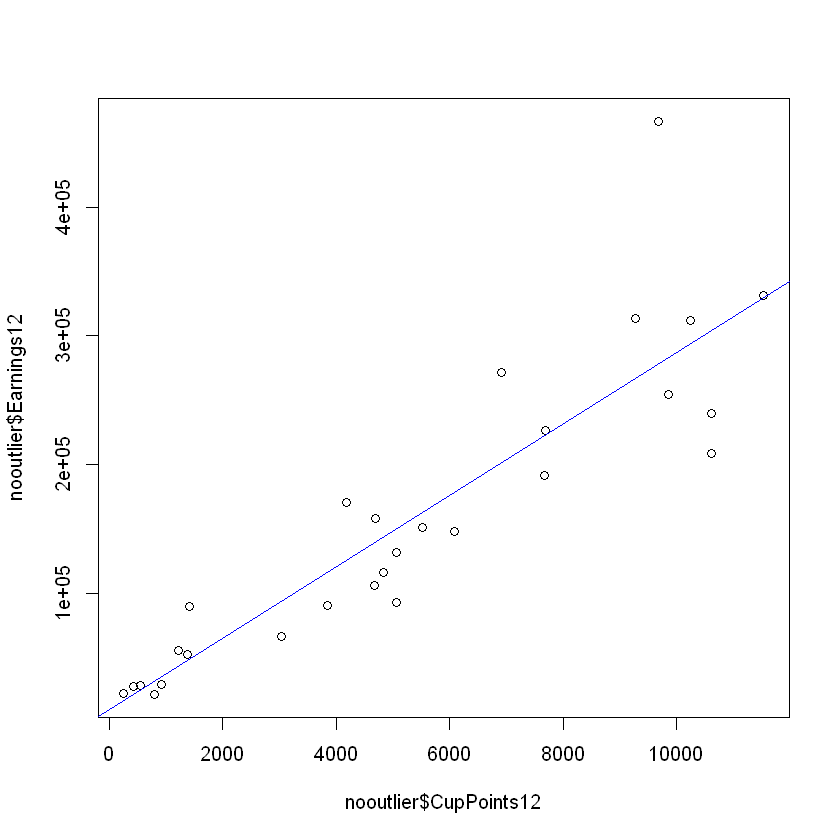

In [37]:
plot(nooutlier$CupPoints12, nooutlier$Earnings12)
abline(lm(nooutlier$Earnings12 ~ nooutlier$CupPoints12), col="blue")

An initial examination of the relationships between Ride Percentage (RidePer) and Earnings, and Cup Points (CupPoints) and Earnings showed that Cup Points had the **weaker** relationship to Earnings. Ride Percentage and Earnings showed a correlation value of **0.593** while Cup Points and Earnings had a correlation value of **0.657**. Visual examination showed an 
**outlier** in both relationships—a rider who has earned over 1 million dollars. Removal of this increased the initial relationship: Ride Percentage and Earnings now had a correlation value of **0.804** and Cup Points and Earnings had a correlation value of **0.893**. **Cup Points** still had the higher relationship to Earnings. Visual examination showed **a 
good linear relationship** for both Ride Percentage and Cup Points, indicating the correct use of the correlation coefficient.

### During a professional bull-riding event, riders usually attempt to ride a bull three or more times.  This means that they can record a "ride" (successfully staying on the bull) multiple times in the same event.

Subset the dataset for riders that had at least 1 ride in the 2014 season. Call this dataset new_bull14.

In [38]:
new_bull14 <- bull[bull$Rides14 > 0,]
new_bull14

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,⋯,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,⋯,0,0,0.00,0,0.00,0,0,0,0.00,0.00
2,Matt Triplett,2,USA,1991,67,160,4,28,86,33,⋯,0,0,0.00,0,0.00,0,0,0,0.00,0.00
3,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,⋯,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
5,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,⋯,0,0,0.00,0,0.00,0,0,0,0.00,0.00
6,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,81,29,⋯,87,53,10608.25,4,0.61,1,10,14,559.50,208724.52
7,Guilherme Marchi,7,BRA,1982,70,180,16,28,90,41,⋯,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
8,Silvano Alves,8,BRA,1987,67,150,7,28,92,50,⋯,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
9,Reese Cates,9,USA,1989,68,135,9,12,30,8,⋯,10,3,428.50,53,0.30,0,0,1,0.00,27987.21
10,J.W. Harris,10,USA,1986,70,160,10,14,37,16,⋯,0,0,0.00,0,0.00,0,0,0,0.00,0.00


Create a new variable or vector for the average number of rides per event for each bull rider in the new_bull14 dataset:

In [40]:
RidesPerEvent14 <- new_bull14$Rides14/new_bull14$Events14

Make a histogram of your "rides per event" variable and find the five-number summary for your "rides per event" variable.

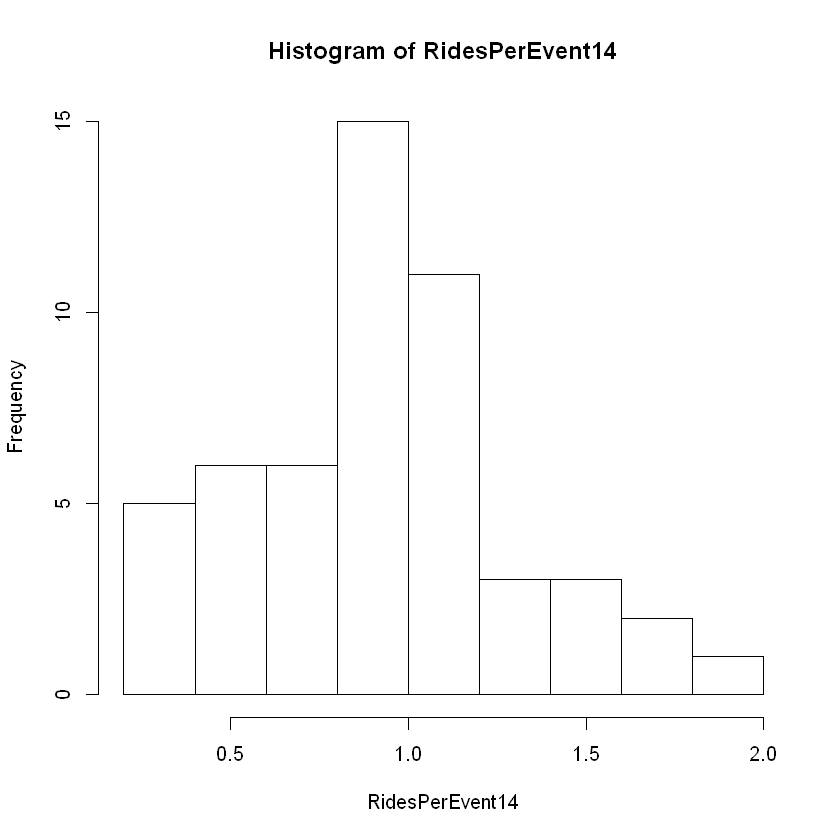

In [41]:
hist(RidesPerEvent14)

What is the minimum value?

In [42]:
min(RidesPerEvent14)

[1] 0.2

What is the median?

In [43]:
median(RidesPerEvent14)

[1] 1

What is the maximum value?

In [44]:
max(RidesPerEvent14)

[1] 2

In [45]:
fivenum(RidesPerEvent14)

[1] 0.2000000 0.6666667 1.0000000 1.1396104 2.0000000

In [46]:
mean(RidesPerEvent14)
sd(RidesPerEvent14)

[1] 0.9376562

[1] 0.3976105

In [47]:
summary(RidesPerEvent14)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.6667  1.0000  0.9377  1.1380  2.0000 

Create a scatterplot of "rides per event" and yearly ranking (defined by the "Rank14" variable) and add a line of best fit.

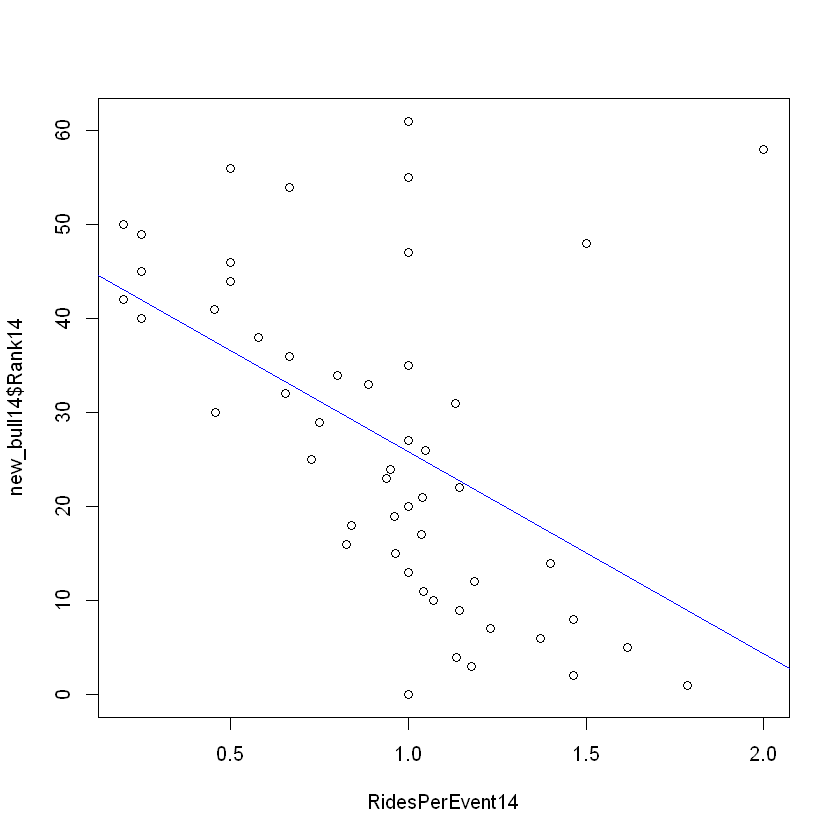

In [48]:
plot(RidesPerEvent14, new_bull14$Rank14)
abline(lm(new_bull14$Rank14 ~ RidesPerEvent14), col="blue")

What is the correlation coefficient for rides per event and yearly ranking?

In [49]:
cor(RidesPerEvent14,new_bull14$Rank14)

[1] -0.4945153

### GPA problem

Suppose that college GPA and graduate school GPA have a correlation coefficient of 0.75. Based on this, what proportion of variation in graduate school GPA is left unexplained after taking college GPA into account? (Report to 4 decimal places)?

In [50]:
1-(round(.75*.75,4))

[1] 0.4375

Using the dataset below, find the correlation coefficient between time spent studying and exam grade.

In [51]:
minutes<-c(30, 45, 180, 95, 130, 140, 30, 80, 60, 110,  0,  80)
grade<- c(74, 68, 87, 90, 94, 84, 92, 88, 82, 93, 65, 90)

Combine vectors into a matrix

In [52]:
study<-cbind(minutes, grade)

What is the correlation coefficient based on the data? (Round to 3 decimal places.)

In [53]:
round(cor(minutes, grade),3)

[1] 0.597

 Approximately what percentage of the variation in exam scores can be explained by the amount of time that each student studied? (Roune to whole number without a % sign.)

In [54]:
round(cor(minutes, grade)*cor(minutes, grade),2)*100

[1] 36

Create a scatterplot of the data (exam grades and time spent studying). What is the value of the outlier (the student that got a high grade but didn't study very long)?

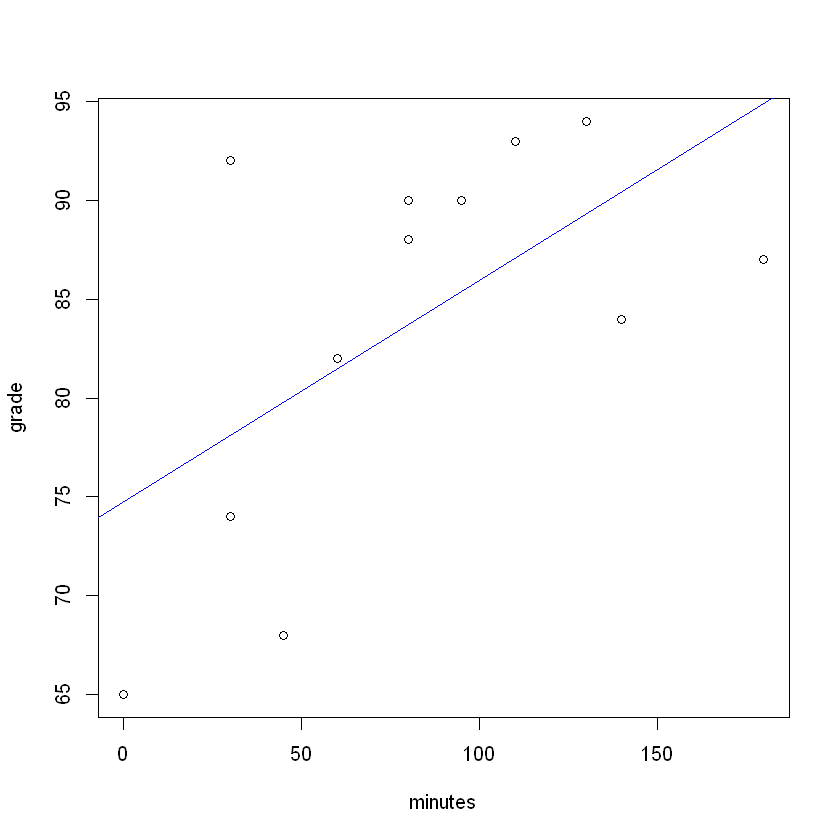

In [55]:
plot(minutes,grade)
abline(lm(grade ~ minutes), col="blue")

(30,92) = study[7,7]

 When the outlier is removed, what is the new value of r? (Round to 3 decimal places.)

In [56]:
noOutlierminutes<-c(30, 45, 180, 95, 130, 140, 80, 60, 110, 0, 80)
noOutliergrade<- c(74, 68, 87, 90, 94, 84, 88, 82, 93, 65, 90) 
round(cor(noOutlierminutes, noOutliergrade),3)

[1] 0.737

How did the outlier impact our efforts to assess the relationship between time spent studying and exam grades?

Answer: The outlier caused the relationship to look weaker than it really is.